<a href="https://colab.research.google.com/github/luismiguelmartinluengo/PySpark_Demos/blob/main/Basicos_Ploting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
import random


In [ ]:
sparkSession = SparkSession.builder.appName('Basicos Ploting').getOrCreate()

In [ ]:
df = sparkSession.read.csv('/content/drive/MyDrive/Colab Notebooks/data/Superstore.csv',
                           sep = ',',
                           quote = '"',
                           escape = '"',
                           header = True,
                           inferSchema = True)
print(df.count())
df.show(5)
df.printSchema()

9994
+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|Row ID|      Order ID|Order Date| Ship Date|     Ship Mode|Customer ID|  Customer Name|  Segment|      Country|           City|     State|Postal Code|Region|     Product ID|       Category|Sub-Category|        Product Name|   Sales|Quantity|Discount|  Profit|
+------+--------------+----------+----------+--------------+-----------+---------------+---------+-------------+---------------+----------+-----------+------+---------------+---------------+------------+--------------------+--------+--------+--------+--------+
|     1|CA-2016-152156| 11/8/2016|11/11/2016|  Second Class|   CG-12520|    Claire Gute| Consumer|United States|      Henderson|  Kentucky|      42420| South|FUR-BO-10001798|      Furniture|   Bookcases|Bush Some

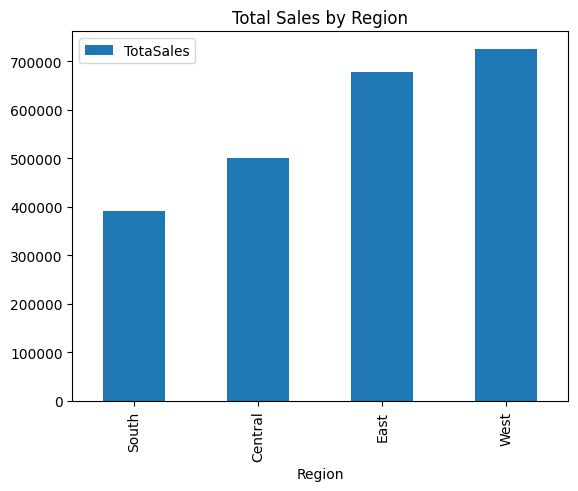

In [ ]:
#Matplotlib
from matplotlib import pyplot as plt
import pandas as pd

dfSalesByRegion = df.groupBy('Region').sum('Sales')\
                    .withColumnRenamed('sum(Sales)','TotaSales')\
                    .toPandas()
dfSalesByRegion.plot(kind = 'bar', x = 'Region', title = 'Total Sales by Region')
plt.show() #Show es necesario para que se dibuje solo el gráfico

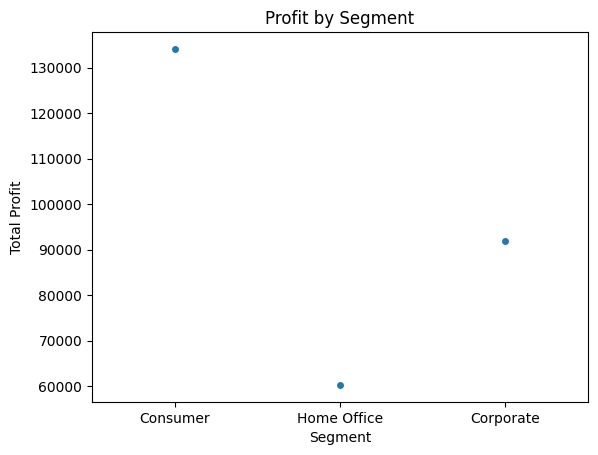

In [ ]:
#Seaborn --> Se construye sobre Matplotlib, así que en Seaborn se hace la configuración del gráfico pero el que dibuja es Matplotlib
#Beneficio por segmento
import seaborn as sbr
dfProfitBySegment = df.groupby('Segment').sum('Profit').withColumnRenamed('sum(Profit)','TotalProfit').toPandas()
axes = sbr.stripplot(data = dfProfitBySegment, x = 'Segment', y = 'TotalProfit', )
axes.set(ylabel = 'Total Profit', title = 'Profit by Segment')
plt.show()

In [ ]:
#Plotly --> no requiere de Matplotlib para dibujar el gráfico

import plotly.express as px

fig = px.bar(dfSalesByRegion, x='Region', y='TotaSales', title='Total Sales by Region')
fig.show()


In [ ]:

ds = sparkSession.read.csv('/content/drive/MyDrive/Colab Notebooks/data/dataset.csv',
                           sep = ',',
                           header = True,
                           inferSchema = True)
ds.show(5)
ds.printSchema()

+---+---+----------+--------------+---------+-----------------+
| ID|Age|Sales_made|Clients_landed| Location|Revenue_generated|
+---+---+----------+--------------+---------+-----------------+
|  1| 35|        75|            15|   Mumbai|           562155|
|  2| 38|        68|            13|Bangalore|           283203|
|  3| 44|         6|            14|Hyderabad|            76275|
|  4| 23|        68|             8|Hyderabad|           424482|
|  5| 26|        47|            15|    Delhi|           758917|
+---+---+----------+--------------+---------+-----------------+
only showing top 5 rows

root
 |-- ID: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Sales_made: integer (nullable = true)
 |-- Clients_landed: integer (nullable = true)
 |-- Location: string (nullable = true)
 |-- Revenue_generated: integer (nullable = true)



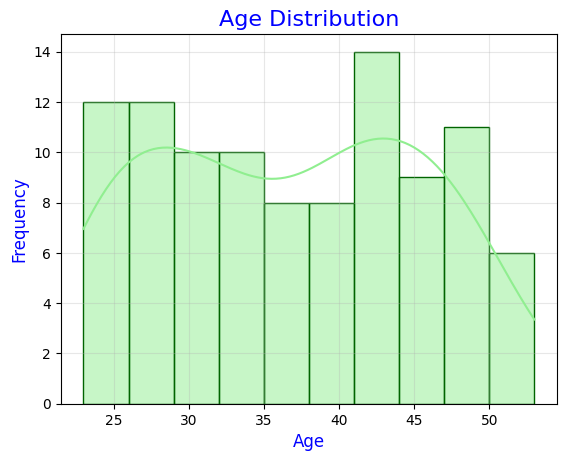

In [ ]:
#Histograma con seaborn
axes = sbr.histplot(ds.toPandas().Age, kde = True, bins = 10, color = 'lightgreen', edgecolor = 'darkgreen')
axes.set_title('Age Distribution', color = 'Blue', fontsize = 16)
axes.set_xlabel('Age', color = 'Blue', fontsize = 12)
axes.set_ylabel('Frequency', color = 'Blue', fontsize = 12)
axes.grid(True, linestyle = '-', alpha = 0.3)
plt.show()

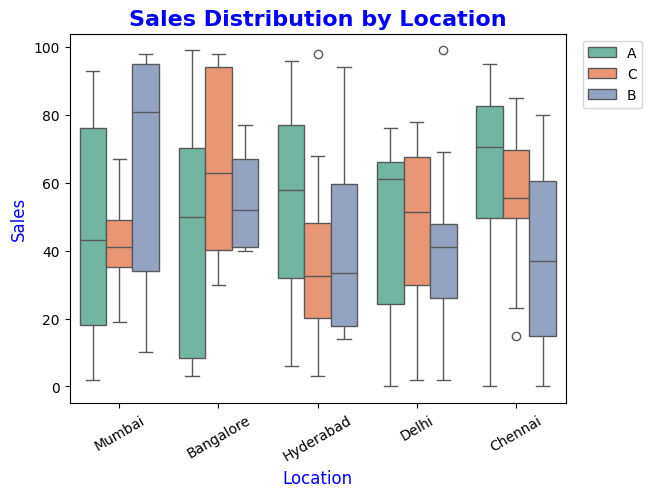

In [ ]:
#boxplot
#Distribución de ventas por localización
random_group_udf = udf(lambda: random.choice(['A', 'B', 'C']))
axes = sbr.boxplot(data = ds.withColumn('Group', random_group_udf()).toPandas(), x = 'Location', y = 'Sales_made', hue = 'Group', palette = 'Set2')
axes.set_title('Sales Distribution by Location', color = 'Blue', fontsize = 16, fontweight = 'bold')
axes.set_xlabel('Location', color = 'Blue', fontsize = 12)
axes.set_ylabel('Sales', color = 'Blue', fontsize = 12)
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')
plt.show()

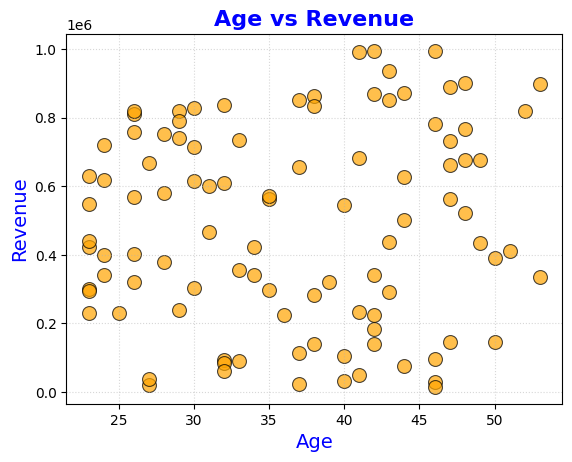

In [ ]:
#scatter
#Relación entre Edad y Revenue
axes = sbr.scatterplot(data = ds.toPandas(), x = 'Age', y = 'Revenue_generated', c= 'orange', alpha = 0.7, edgecolors = 'black', s = 100)
axes.set_title('Age vs Revenue', color = 'Blue', fontsize = 16, fontweight = 'bold')
axes.set_xlabel('Age', color = 'Blue', fontsize = 14)
axes.set_ylabel('Revenue', color = 'Blue', fontsize = 14)
plt.grid(True, linestyle = ':', alpha = 0.5)
plt.show()

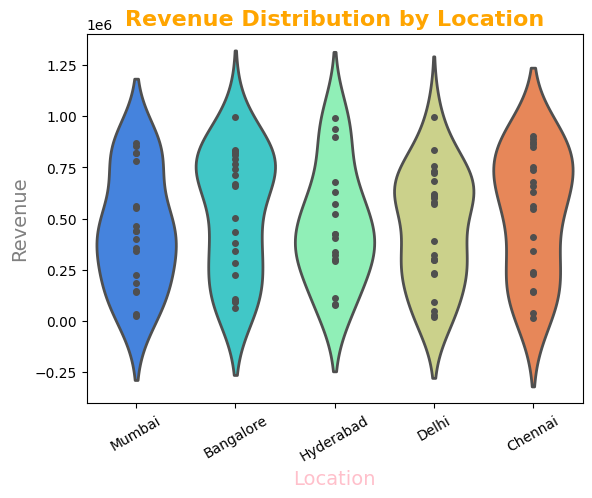

In [ ]:
#violinplot
#Revenue by Location
axes = sbr.violinplot(data = ds.toPandas(), x = 'Location', y = 'Revenue_generated', inner = 'point', linewidth = 2, hue = 'Location', palette = 'rainbow')
axes.set_title('Revenue Distribution by Location', color = 'Orange', fontsize = 16, fontweight = 'bold')
axes.set_xlabel('Location', color = 'pink', fontsize = 14)
axes.set_ylabel('Revenue', color = 'gray', fontsize = 14)
plt.xticks(rotation = 30)
plt.show()

In [ ]:
#Scatter con plotly
#Relación entre ventas y clientes conseguidos
figure = px.scatter(ds,
                    x = 'Sales_made',
                    y = 'Clients_landed',
                    color = 'Location',
                    size = 'Revenue_generated',
                    size_max = 30,
                    title = 'Sales vs Clients Landed',
                    labels = {'Sales_made':'Sales Made','Clientes_landed':'Clientes Landed'},
                    hover_name = 'ID',
                    hover_data = {'Age': True, 'Revenue_generated': False},
                    opacity = 0.8)
figure.update_layout(title_font_size = 18, title_font_family = 'Arial', title_font_color = 'orange')
figure.update_layout(legend_title_font_size = 14, legend_title_font_color = 'purple')
figure.update_layout(font= dict(family = 'Lato', size = 12, color = 'Blue'))#esto aplica a todos los textos del gráfico
figure.update_traces(marker = dict(line = dict(width = 1, color = 'red')), selector= dict(mode = 'markers'))
figure.show()

i

In [ ]:
#BarChart con plotly
#Revenue by Location
dsRevenueByLocation = ds.groupby('Location').sum('Revenue_generated').toPandas()
figure = px.bar(dsRevenueByLocation,
                x = 'Location',
                y = 'sum(Revenue_generated)',
                labels = {'sum(Revenue_generated)':'Revenue'},
                color = 'Location',
                color_discrete_sequence = px.colors.qualitative.Set3,
                title = 'Total Revenue generated by Location')
figure.update_layout(title_font_size = 20, title_x = 0.5, title_font_family = 'Arial', title_font_color = 'green')
figure.update_layout(xaxis = dict(title_font_size = 14, title_font_family = 'Lato', title_font_color = 'pink'))
figure.update_layout(yaxis = dict(title_font_size = 14, title_font_family = 'Lato', title_font_color = 'red'))
figure.update_layout(legend_title_font_size = 14, legend_title_font_color = 'purple')
figure.show()